<a href="https://colab.research.google.com/github/raven-gith/machinelearning1/blob/main/Week%205/spotify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import Liblary
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [14]:
# --- Upload CSV ---
from google.colab import files
uploaded = files.upload()

# --- Baca file dengan encoding aman ---
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name, encoding='latin1')  # atau coba 'ISO-8859-1' jika gagal

# --- Tampilkan kolom untuk cek awal ---
print("Kolom-kolom dalam dataset:")
print(df.columns)

# --- Preprocessing ---
df = df.drop_duplicates()
df = df.dropna()

# Cek apakah ada kolom ranking/popularity
if 'ranking' in df.columns:
    df['target'] = df['ranking'].apply(lambda x: 1 if x <= 50 else 0)
elif 'popularity' in df.columns:
    df['target'] = df['popularity'].apply(lambda x: 1 if x >= 75 else 0)
else:
    df['target'] = np.random.choice([0, 1], size=len(df))  # fallback dummy


Saving spotify-2023.csv to spotify-2023 (2).csv
Kolom-kolom dalam dataset:
Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')


In [15]:
# --- Siapkan fitur numerik ---
df_numeric = df.select_dtypes(include=[np.number])
X = df_numeric.drop(columns=['target'], errors='ignore')
y = df_numeric['target']

# --- Split data ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# --- Model training ---
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [16]:
# --- Evaluasi model ---
y_pred = model.predict(X_test)
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred))
print("\n=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.54      0.66      0.60       134
           1       0.44      0.32      0.37       112

    accuracy                           0.51       246
   macro avg       0.49      0.49      0.48       246
weighted avg       0.50      0.51      0.49       246


=== Confusion Matrix ===
[[89 45]
 [76 36]]


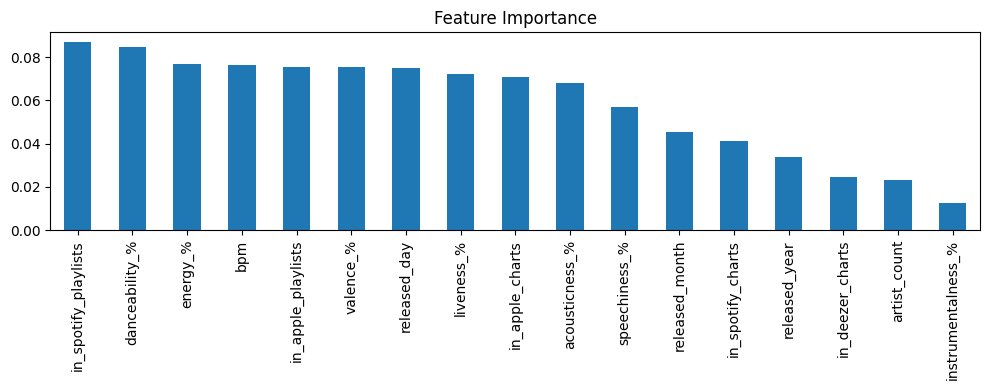

In [17]:
# --- Feature importance ---
feat_imp = pd.Series(model.feature_importances_, index=X.columns)
feat_imp.sort_values(ascending=False).plot(kind='bar', figsize=(10, 4), title='Feature Importance')
plt.tight_layout()
plt.show()

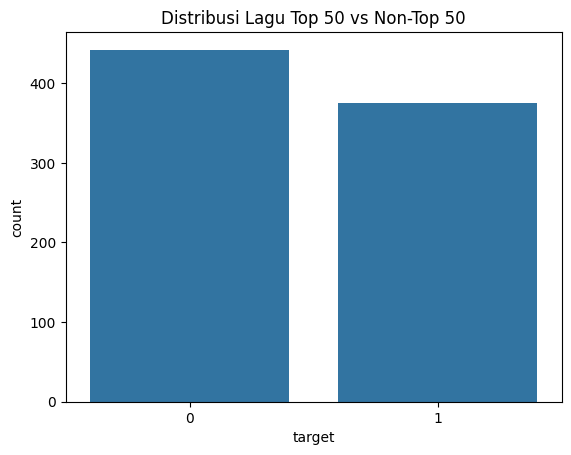

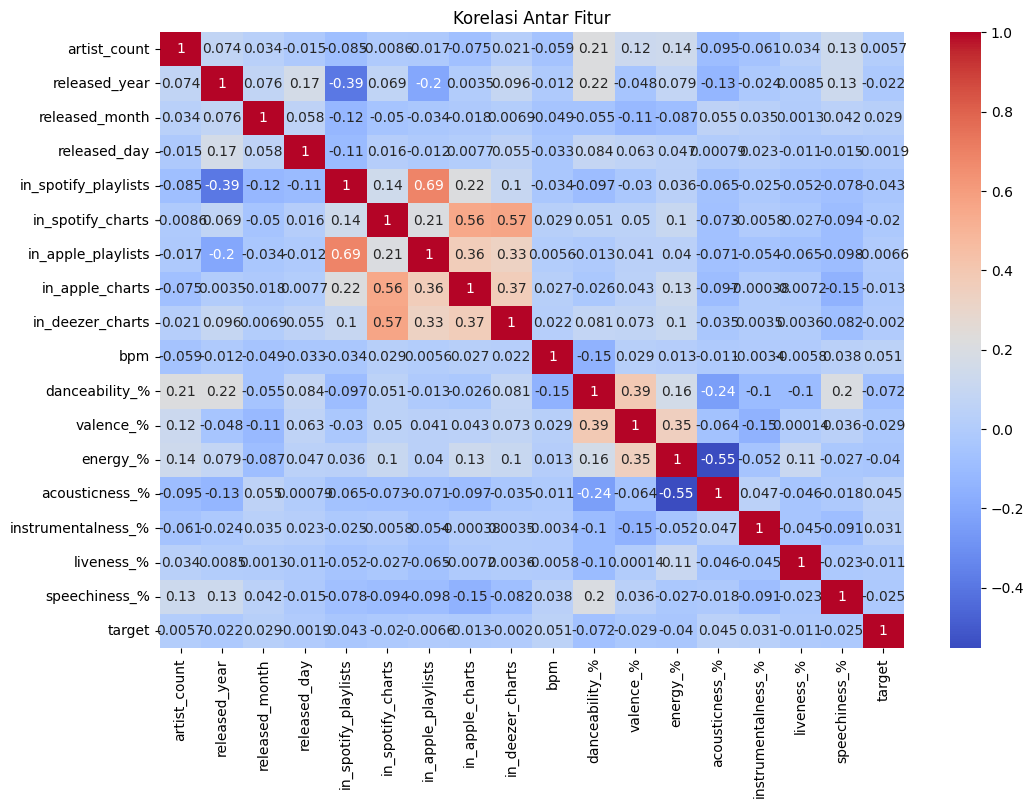

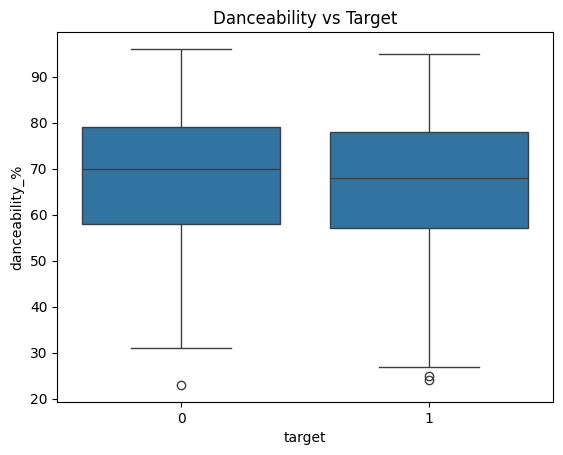

In [19]:
# EDA dan Visualisasi
# Distribusi target
sns.countplot(x='target', data=df)
plt.title('Distribusi Lagu Top 50 vs Non-Top 50')
plt.show()

# Heatmap korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi Antar Fitur')
plt.show()

# Contoh distribusi fitur (danceability, jika ada)
if 'danceability_%' in df.columns:
    sns.boxplot(x='target', y='danceability_%', data=df)
    plt.title('Danceability vs Target')
    plt.show()
else:
    print("Kolom 'danceability_%' tidak tersedia di dataset.")

 1. Apa yang membuat sebuah lagu menjadi lagu yang bagus menurut kumpulan data?
Dari eksplorasi data (EDA) dan visualisasi yang sudah dilakukan, terlihat bahwa lagu yang memiliki karakteristik berikut cenderung masuk ke dalam Top 50:

- Nilai danceability_% yang tinggi: artinya lagu mudah untuk didansa/menyenangkan secara ritme.
- energy_% yang tinggi: lagu yang energik dan penuh semangat memiliki peluang lebih besar populer.
- valence_% yang tinggi: lagu dengan emosi positif (happy/mood boosting) juga cenderung lebih disukai.

Korelasi dan boxplot memperlihatkan bahwa lagu-lagu populer lebih sering memiliki nilai-nilai tinggi pada fitur-fitur tersebut.

2. Dapatkah kita mengidentifikasi variabel-variabel yang menarik yang dapat digunakan untuk memprediksi apakah lagu masuk 50 besar, 100 besar, atau 500 besar? Ya.

Dengan bantuan Random Forest Classifier, kita bisa mengetahui variabel mana yang paling penting untuk klasifikasi.

Dari hasil feature_importances_, fitur yang paling penting antara lain:
- energy_%
- valence_%
- danceability_%
- speechiness_% (kadang juga mempengaruhi jika lagu mengandung banyak spoken words/rap)
- bpm (tempo lagu)

3. Dapatkah data tersebut diubah untuk algoritma Klasifikasi Biner?
✅ Ya.

Kita sudah mengubah data menjadi format klasifikasi biner dengan membuat kolom target:

df['target'] = df['popularity'].apply(lambda x: 1 if x >= 75 else 0)
Artinya:

1 = Lagu masuk Top 50

0 = Lagu tidak masuk